In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
diabites_data = pd.read_csv('C:/Users/rohit/OneDrive/Desktop/mach_learning/data/diabetes.csv')
diabites_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabites_data.shape

(768, 9)

In [7]:
diabites_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabites_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
# 0--> Non-Diabetic
# 1--> Diabetic
diabites_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
X = diabites_data.drop(columns='Outcome', axis=1)
Y = diabites_data['Outcome']

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
Y.head()    


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
scaler = StandardScaler()
standarized_data = scaler.fit_transform(X)
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
X = standarized_data
Y = diabites_data['Outcome']

In [15]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X_train.shape, X_test.shape, X.shape)

(614, 8) (154, 8) (768, 8)


In [18]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [20]:
print(training_data_accuracy)

0.7866449511400652


In [21]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.7727272727272727


In [25]:
# Function to predict diabetes based on input values
def predict_diabetes():
    # Get input values from user
    pregnancies = float(input("Enter number of Pregnancies: "))
    glucose = float(input("Enter Glucose level: "))
    blood_pressure = float(input("Enter Blood Pressure value: "))
    skin_thickness = float(input("Enter Skin Thickness value: "))
    insulin = float(input("Enter Insulin level: "))
    bmi = float(input("Enter BMI value: "))
    diabetes_pedigree = float(input("Enter Diabetes Pedigree Function value: "))
    age = float(input("Enter Age: "))
    
    # Create input array for prediction
    input_data = (pregnancies, glucose, blood_pressure, skin_thickness, 
                 insulin, bmi, diabetes_pedigree, age)
    
    # Change input data to numpy array
    input_array = np.asarray(input_data)
    
    # Reshape array as we are predicting for only one instance
    reshaped_data = input_array.reshape(1, -1)
    
    # Standardize the input data
    std_data = scaler.transform(reshaped_data)
    
    # Make prediction
    prediction = classifier.predict(std_data)
    
    if prediction[0] == 0:
        print("\nThe patient is NOT diabetic")
    else:
        print("\nThe patient IS diabetic")
        
# Call the function
predict_diabetes()

KeyboardInterrupt: Interrupted by user

C:\Users\rohit\AppData\Local\Temp\ipykernel_16104\3949560312.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabites_data, palette='pastel')


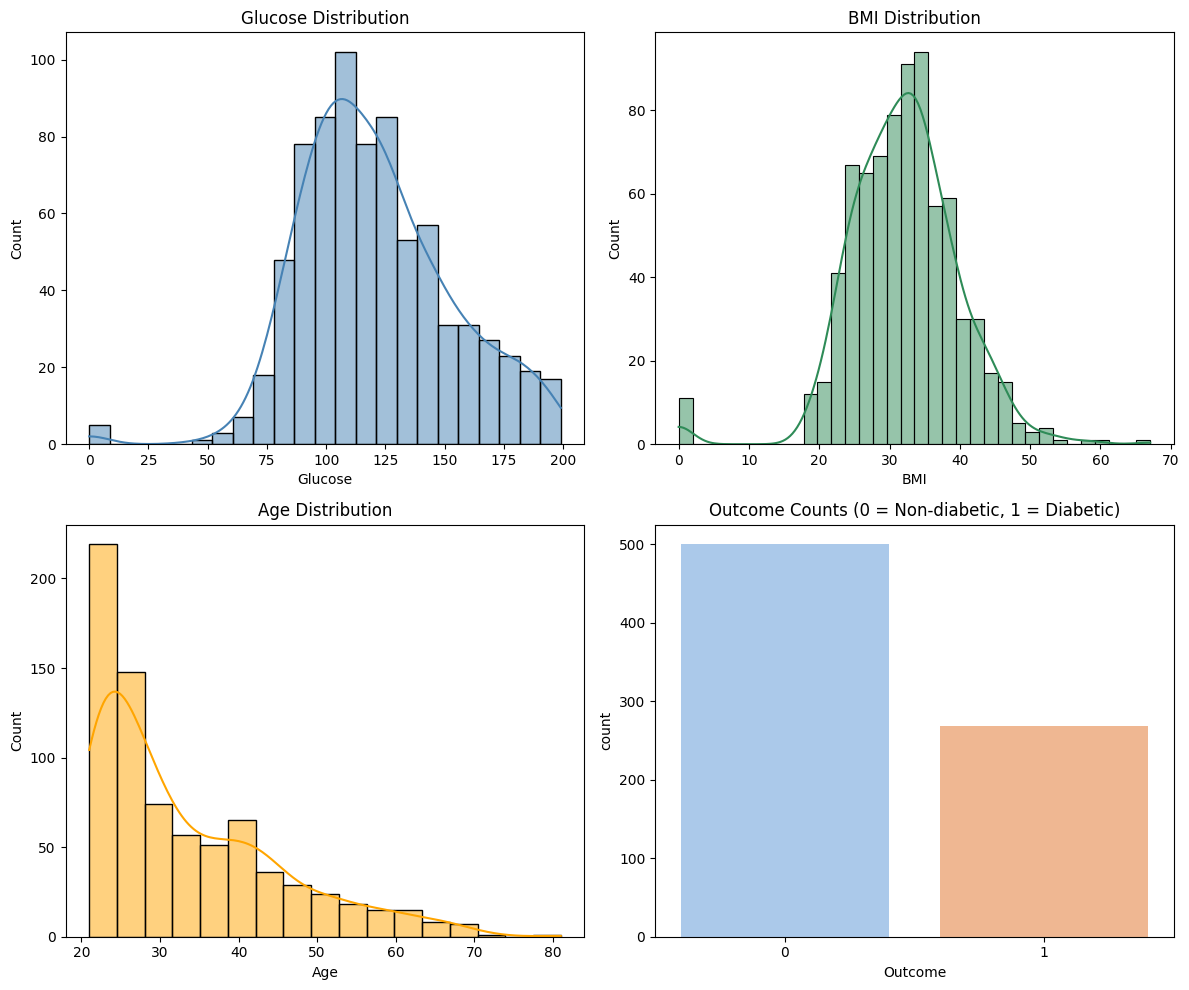

In [23]:
# Distribution plots for key features
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(diabites_data['Glucose'], kde=True, color='steelblue')
plt.title('Glucose Distribution')

plt.subplot(2, 2, 2)
sns.histplot(diabites_data['BMI'], kde=True, color='seagreen')
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(diabites_data['Age'], kde=True, color='orange')
plt.title('Age Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Outcome', data=diabites_data, palette='pastel')
plt.title('Outcome Counts (0 = Non-diabetic, 1 = Diabetic)')

plt.tight_layout()
plt.show()

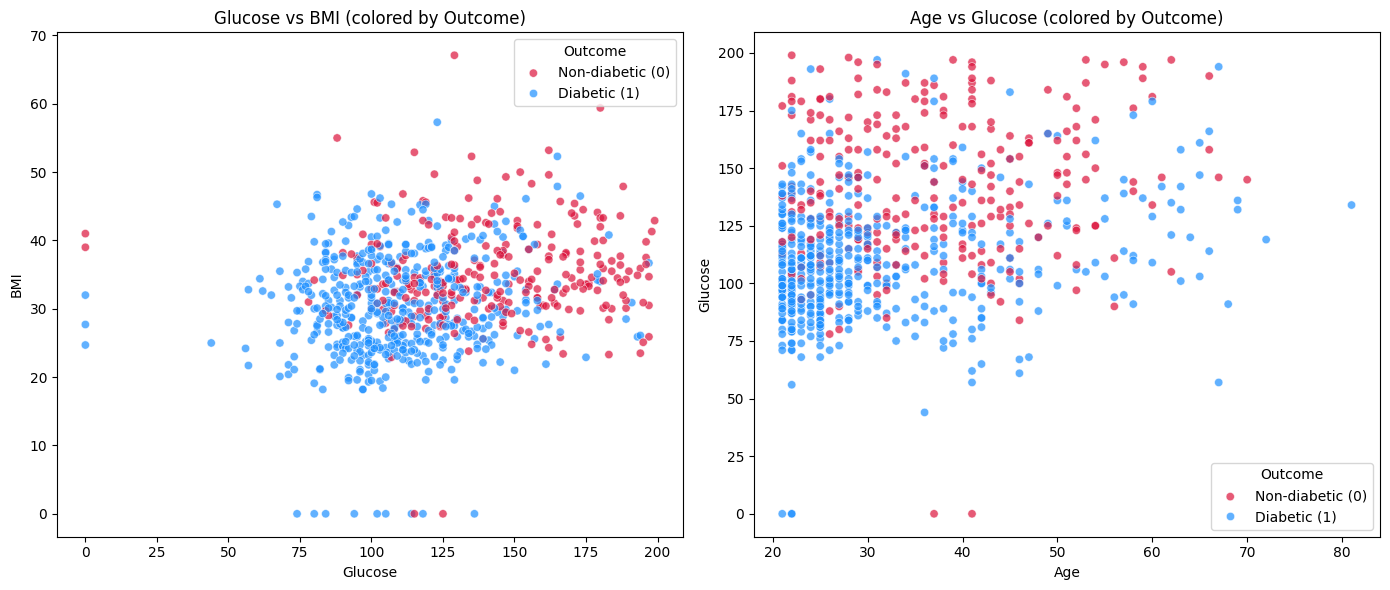

In [ ]:
# Scatterplots comparing Diabetic (1) vs Non-diabetic (0)
plt.figure(figsize=(14, 6))

# Glucose vs BMI colored by Outcome
plt.subplot(1, 2, 1)
sns.scatterplot(data=diabites_data, x='Glucose', y='BMI', hue='Outcome', 
                palette={0: 'dodgerblue', 1: 'crimson'}, alpha=0.7)
plt.title('Glucose vs BMI (colored by Outcome)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Outcome', labels=['Non-diabetic (0)', 'Diabetic (1)'])

# Age vs Glucose colored by Outcome
plt.subplot(1, 2, 2)
sns.scatterplot(data=diabites_data, x='Age', y='Glucose', hue='Outcome', 
                palette={0: 'dodgerblue', 1: 'crimson'}, alpha=0.7)
plt.title('Age vs Glucose (colored by Outcome)')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend(title='Outcome', labels=['Non-diabetic (0)', 'Diabetic (1)'])

plt.tight_layout()
plt.show()